In [22]:
import astropy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.io.votable import parse
from astropy.coordinates import FK5
from astropy.coordinates import SkyCoord


# importing the data file from Gaia
df1 = pd.read_csv("C:/Users/demar/Downloads/320_PleiadesData.csv", skipinitialspace = True)

In [23]:
# transforming coordinate systems
c = []
dec = []
ra = []
pc = []

for i in range (0,489):
    # from astropy.org
    c_icrs = SkyCoord(df1['ra'][i]*u.degree, df1['dec'][i]*u.degree, frame='icrs', unit = 'deg')
    c_fk5 = c_icrs.transform_to('fk5')
    c_fk5 = c_fk5.transform_to(FK5(equinox='J2000.000'))  # to convert to 2000 equinox  
    c.append(c_fk5.to_string('hmsdms'))
    # for part 3 ... distance in parsec = (1/parallax) thus
    pc_distance = abs(1/(df1.parallax[i]/1000))
    pc.append(pc_distance)
    
    # now to convert ra & dec to HMS & DMS
    ra.append(c_fk5.ra.hour)
    dec.append(c_fk5.dec.degree)
    

c = pd.Series(c, name = 'Position in H:M:S and D:M:S for 2000 equinox')
ra = pd.Series(ra, name = 'hours for 2000 equinox')
dec = pd.Series(dec, name = 'degrees for 2000 equinox')
pc = pd.Series(pc, name = 'pc')

Text(0.5, 1.0, 'Pleiades Star Cluster Positions with respect to \n 2000 Equinox and Radius = 1°')

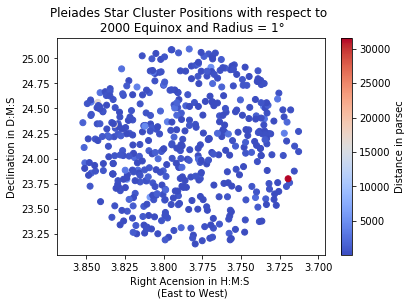

In [24]:
# part 3 - need to invert x-axis
plt.figure(1)
plt.gca().invert_xaxis()
plt.scatter(ra,dec,c = pc, cmap=plt.cm.coolwarm)
bar = plt.colorbar()
bar.set_label('Distance in parsec')
plt.xlabel('Right Acension in H:M:S \n (East to West)')
plt.ylabel('Declination in D:M:S')
plt.title('Pleiades Star Cluster Positions with respect to \n 2000 Equinox and Radius = 1\u00b0')          

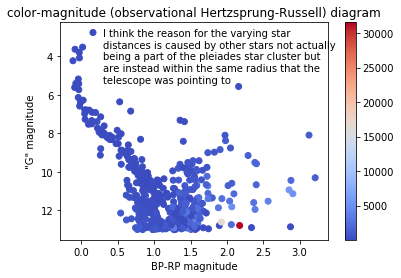

In [25]:
# part 4 need to invert y-axis
Gmag = df1.phot_g_mean_mag
bp_rp = df1.bp_rp

plt.figure(2)
plt.gca().invert_yaxis()
plt.scatter(bp_rp,Gmag,c = pc, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.title('color-magnitude (observational Hertzsprung-Russell) diagram')
plt.xlabel('BP-RP magnitude')
plt.ylabel('"G" magnitude')
plt.figtext(.225, .67, "I think the reason for the varying star \ndistances is caused by other stars not actually\nbeing a part of the pleiades star cluster but\nare instead within the same radius that the\ntelescope was pointing to")
plt.show()